In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
all_synthetic_trj = pd.read_csv('data_save/all_synthetic_trj.csv', header=0)
traj_info = pd.read_csv('data_save/all_state_change_point_record.csv', header=0)
results = pd.read_csv('data_save/scale_sensitivity_analysis_results.csv', header = 0)

state_change_label = {0: 'A-F', 1: 'A-D', 2: 'S-A', 3: 'F-D', 4: 'D-S'}

In [15]:
#######get the mae of of each scale of each trajectory, categorized based on their state_change_label#############

#only include the trajectories with certain rate and jerk; if False, include all trajs
filter_condition, a_tar, jerk_tar = True, 2.0, 1.0

mean_mae = {}
sub_result_dict = {}
for look_at_label in [0, 2, 3, 4]:    
    #sub-df of the trajectories with corresponding label
    sub_results = results[results['state_change_label']  == look_at_label]
    sub_result_dict[look_at_label] = sub_results
    
    #application of jerk and rate filter, if filter_condition == True
    if filter_condition:
        filter_results = sub_results[sub_results['test_jerk'] == jerk_tar]
        if state_change_label[look_at_label] == 'A-F':
            filter_results = sub_results[sub_results['test_acc'].astype('float') == a_tar]
        if state_change_label[look_at_label] == 'S-A':
            filter_results = sub_results[sub_results['test_acc'].astype('float') == a_tar]
        if state_change_label[look_at_label] == 'F-D':
            filter_results = sub_results[sub_results['test_dec'].astype('float') == -a_tar]
        if state_change_label[look_at_label] == 'D-S':
            filter_results = sub_results[sub_results['test_dec'].astype('float') == -a_tar]
    else:
        filter_results = sub_results
    
    #get mae columns
    mae_columns = [c for c in results.columns if 'mae' in c]
    all_mae = filter_results[mae_columns]
    #average mae among all trajectories in this sub-df
    mean_mae[look_at_label] = list(all_mae.mean(axis=0))

###for DEBUG purpose#####
# filter_results.to_csv('temp.csv')

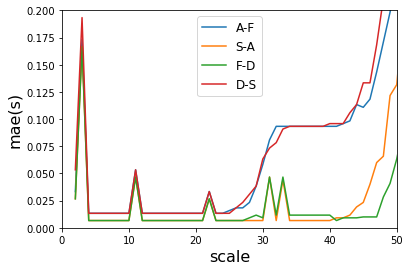

In [12]:
#########################draw the mae curve of each category #################
for i in mean_mae.keys():
    plt.plot(range(2,128), mean_mae[i], label = state_change_label[i])
    plt.legend(fontsize=12)
    plt.ylabel('mae(s)',fontsize=16)
    plt.xlabel('scale',fontsize=16)
    plt.xlim(0, 50)
    plt.ylim(0, 0.2)

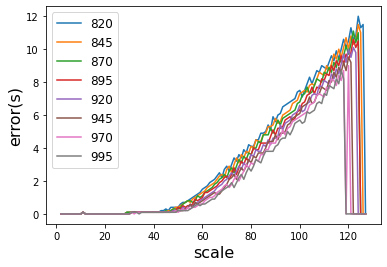

In [27]:
#########################draw the error curve of each trajectory in the same category#######################
for i in all_mae.index:
    plt.plot(range(2,128), all_mae.loc[i,:], label = i)
    plt.legend(fontsize=12)
    plt.ylabel('error(s)',fontsize=16)
    plt.xlabel('scale',fontsize=16)
#     plt.xlim(0, 50)
#     plt.ylim(0, 0.5)

In [17]:
#####impact of jerk and acceleration rate ###
#(TODO: Jieming): start from sub_results of a specific category,
#1. control test_acc/test_dec, plot the mae curve with diffrerent test_jerk 
#1. control test_jerk, plot the mae curve with diffrerent test_acc

sub_result_dict[0]


,Unnamed: 0,index,Unnamed: 0.1,veh_id,test_acc,test_dec,test_jerk,change_point_time_1,change_point_time_2,zero_acc_time,...,scale_123_time,scale_123_mae,scale_124_time,scale_124_mae,scale_125_time,scale_125_mae,scale_126_time,scale_126_mae,scale_127_time,scale_127_mae
0,0,0,0,0.0,1.0,-,0.5,6.000000,8.0,8.0,...,16.3,9.300000,16.5,9.500000,16.5,9.500000,16.9,9.900000,16.6,9.600000
1,1,1,0,1.0,1.0,-,1.0,7.000000,8.0,8.0,...,16.5,9.000000,16.5,9.000000,16.5,9.000000,16.9,9.400000,16.6,9.100000
2,2,2,0,2.0,1.0,-,1.5,7.333333,8.0,8.0,...,16.5,8.833333,16.7,9.033333,16.7,9.033333,16.9,9.233333,16.8,9.133333
3,3,3,0,3.0,1.0,-,2.0,7.500000,8.0,8.0,...,16.5,8.750000,16.7,8.950000,16.7,8.950000,16.9,9.150000,16.8,9.050000
4,4,4,0,4.0,1.0,-,2.5,7.600000,8.0,8.0,...,16.5,8.700000,16.7,8.900000,16.7,8.900000,16.9,9.100000,16.8,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,0,195.0,3.0,-,0.5,5.500000,11.5,11.5,...,16.9,8.400000,16.9,8.400000,16.9,8.400000,16.9,8.400000,17.0,8.500000
196,196,196,0,196.0,3.0,-,1.0,8.500000,11.5,11.5,...,17.3,7.300000,17.3,7.300000,17.3,7.300000,17.3,7.300000,17.4,7.400000
197,197,197,0,197.0,3.0,-,1.5,9.500000,11.5,11.5,...,17.8,7.300000,17.3,6.800000,17.5,7.000000,17.5,7.000000,17.4,6.900000
198,198,198,0,198.0,3.0,-,2.0,10.000000,11.5,11.5,...,17.8,7.050000,17.5,6.750000,17.5,6.750000,17.5,6.750000,17.6,6.850000


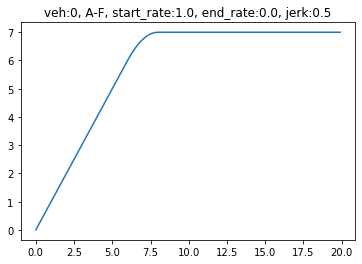

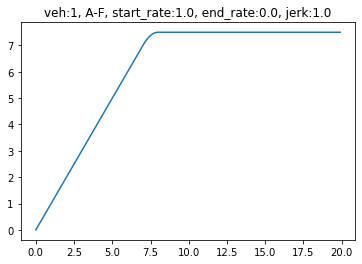

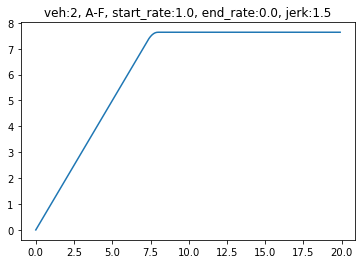

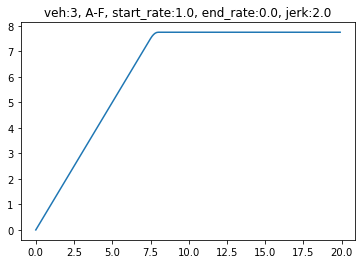

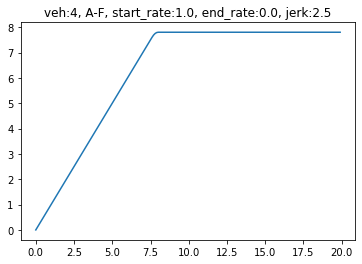

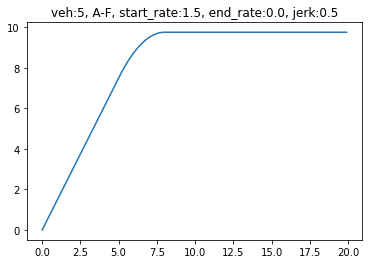

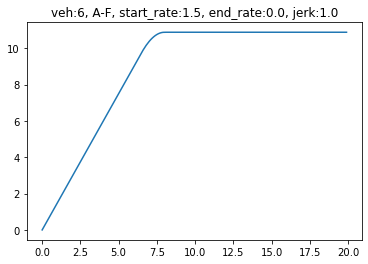

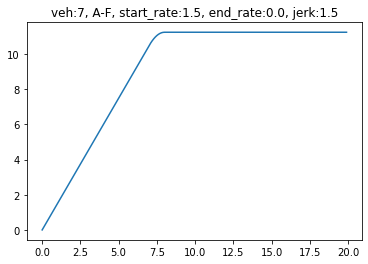

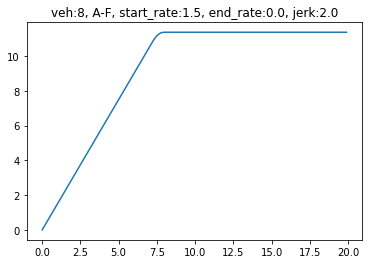

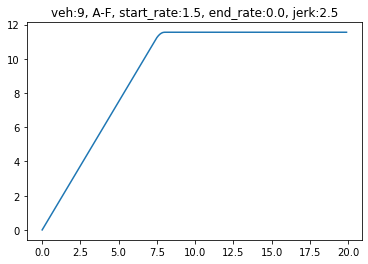

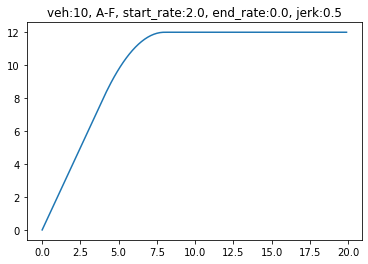

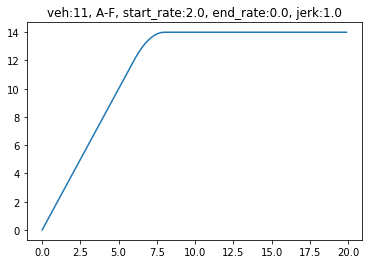

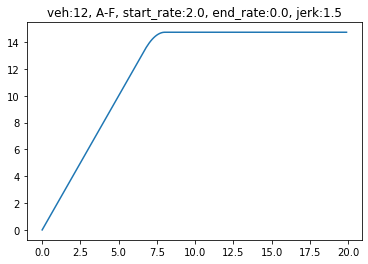

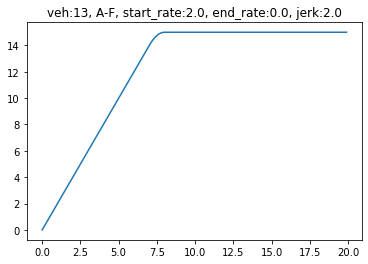

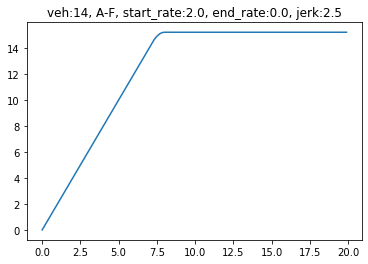

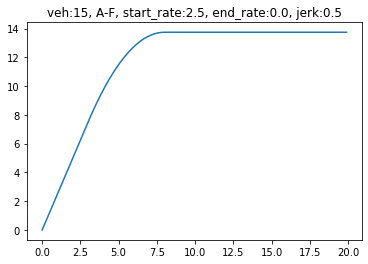

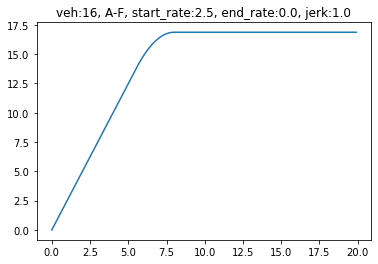

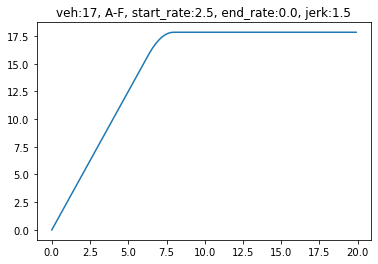

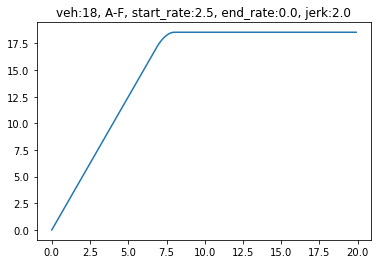

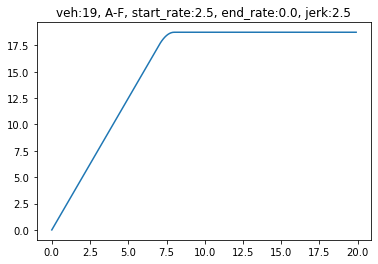

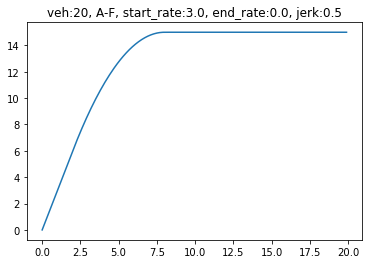

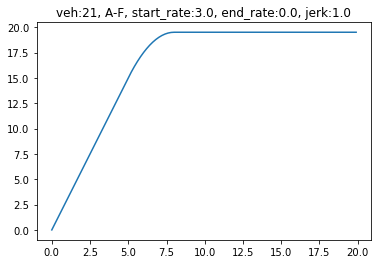

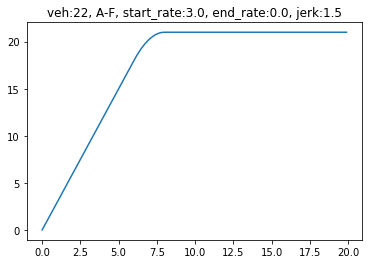

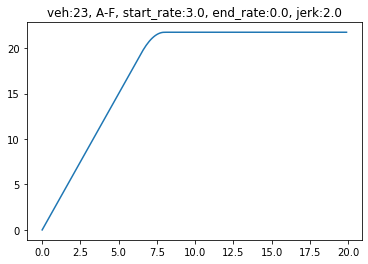

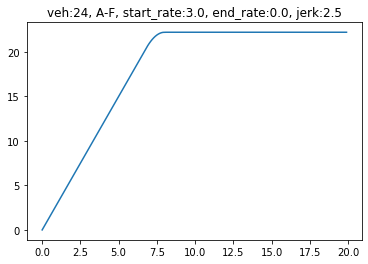

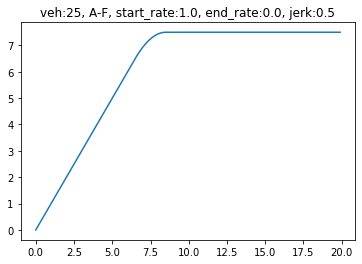

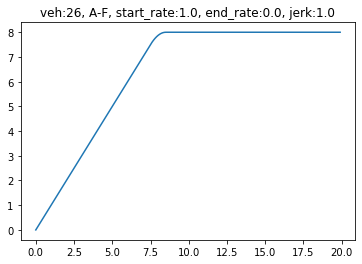

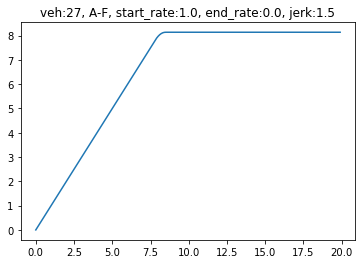

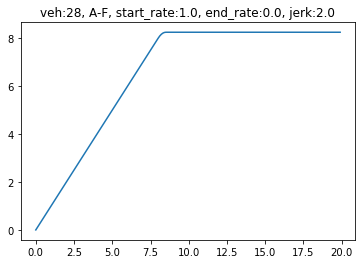

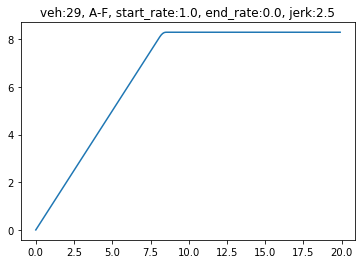

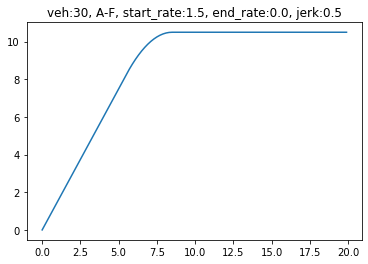

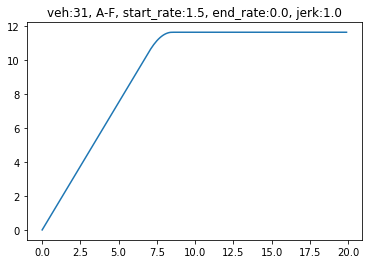

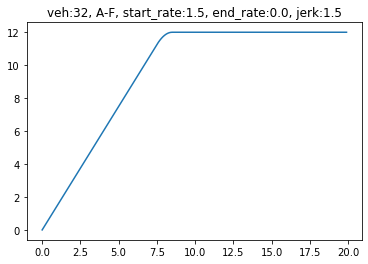

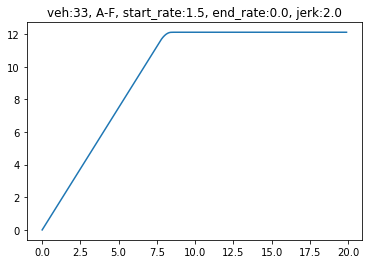

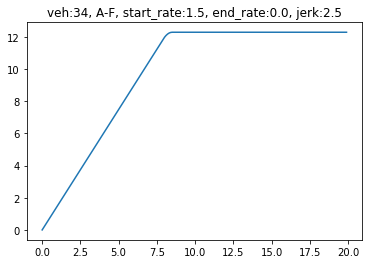

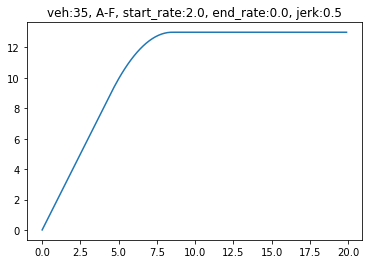

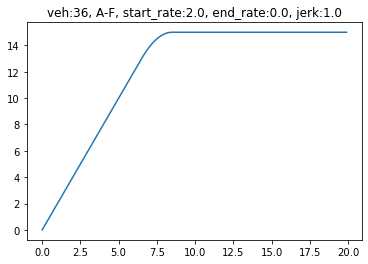

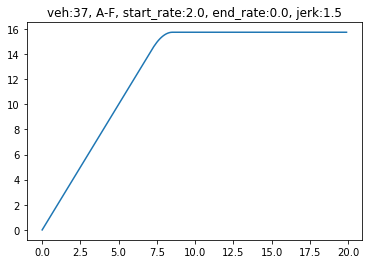

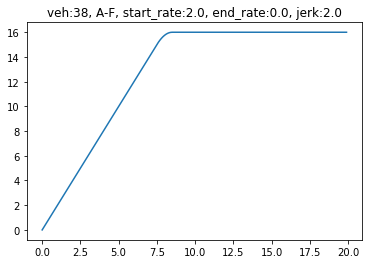

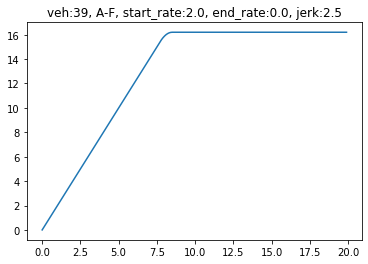

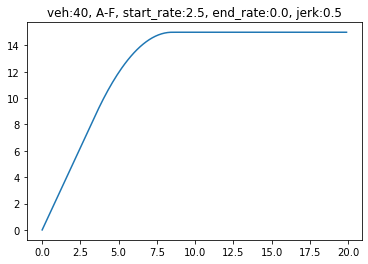

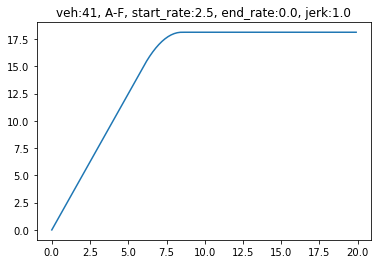

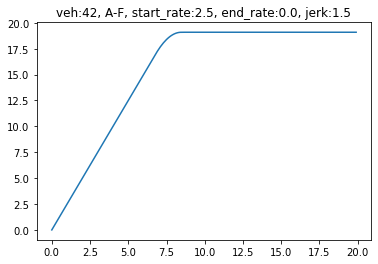

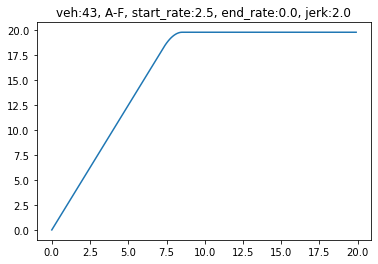

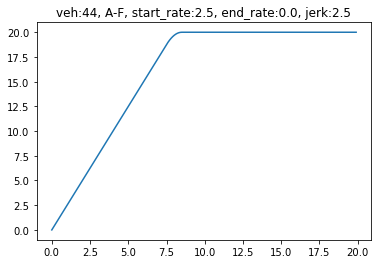

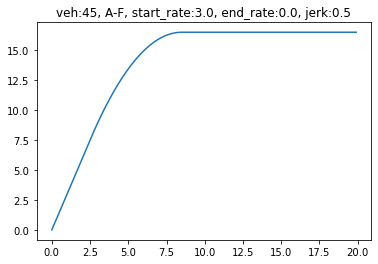

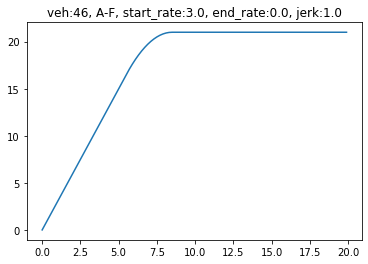

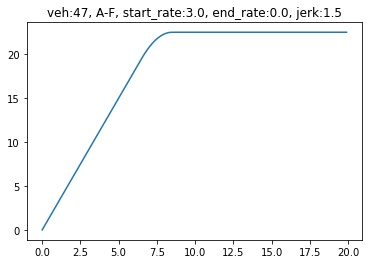

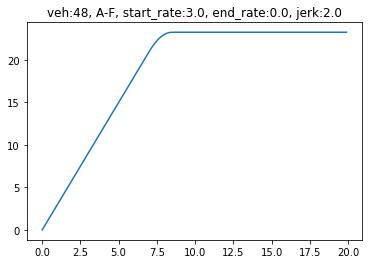

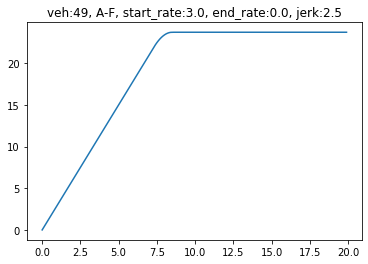

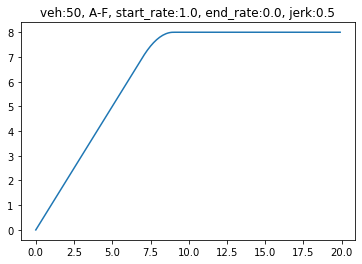

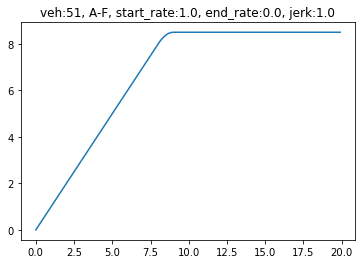

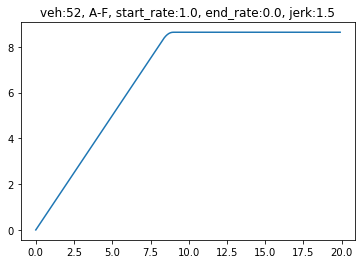

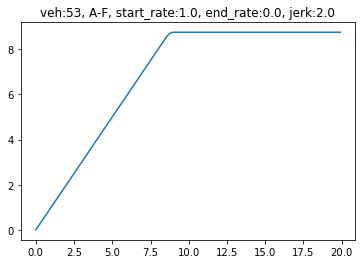

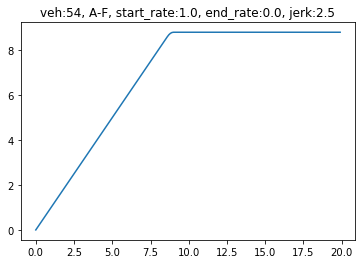

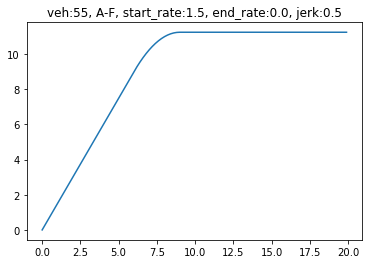

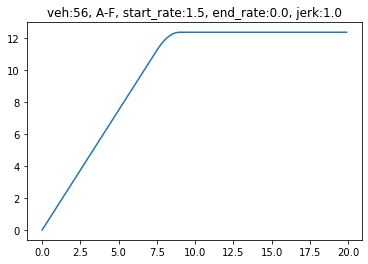

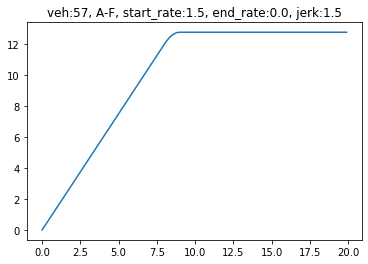

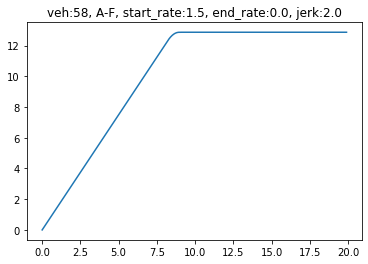

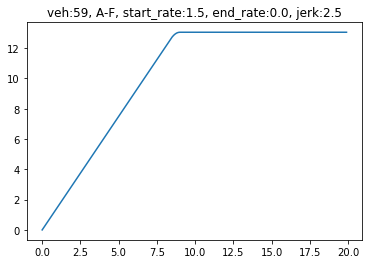

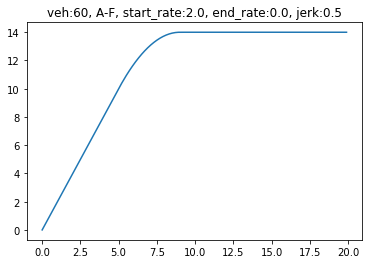

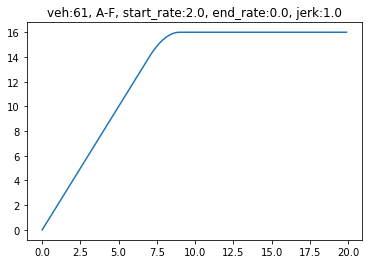

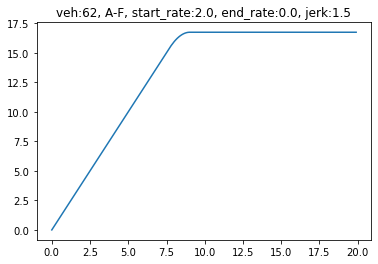

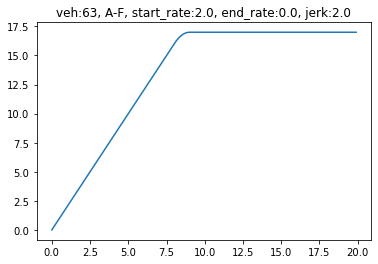

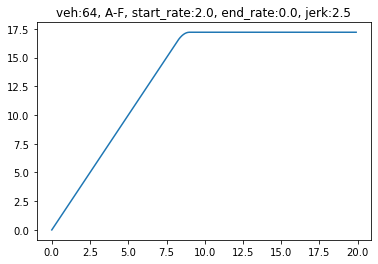

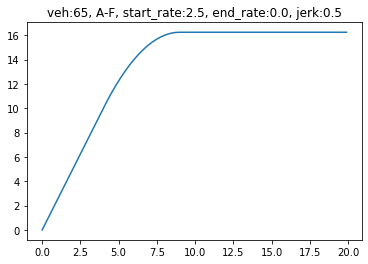

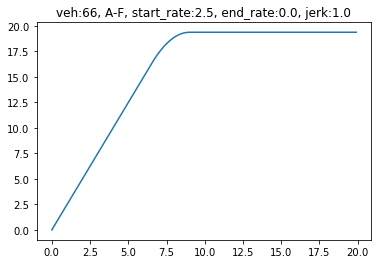

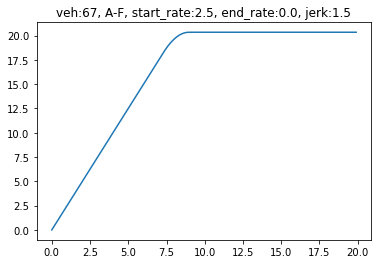

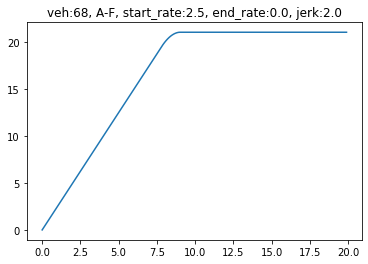

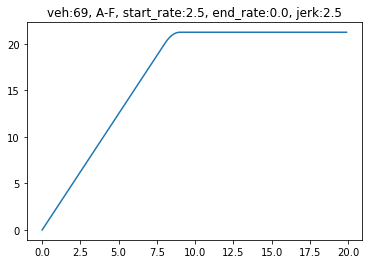

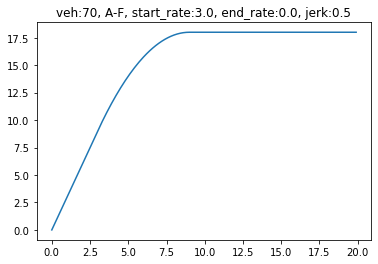

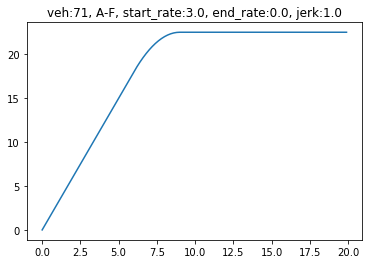

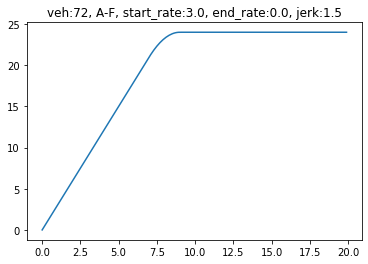

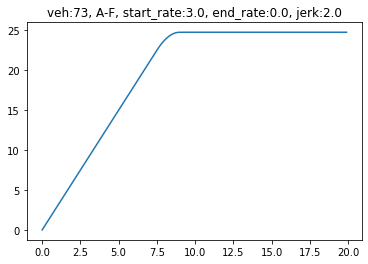

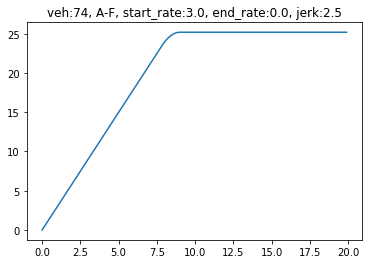

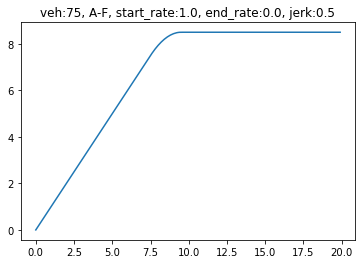

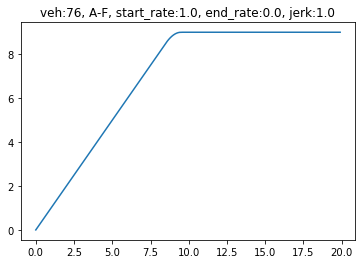

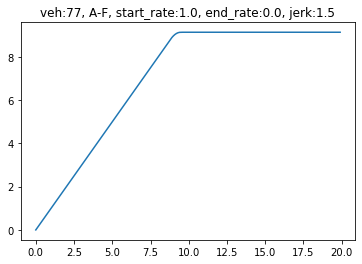

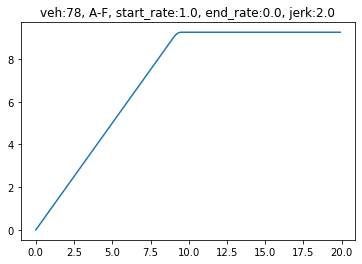

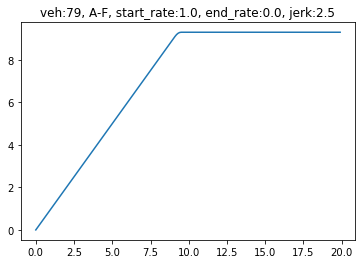

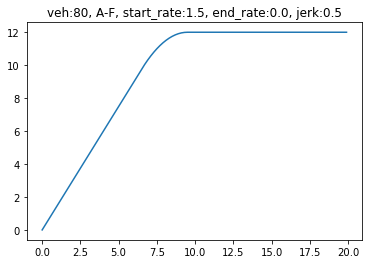

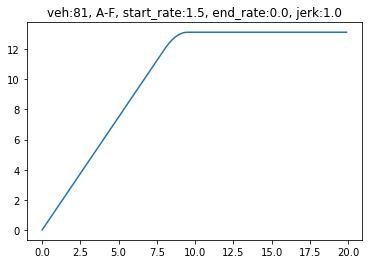

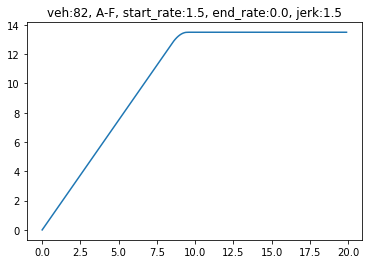

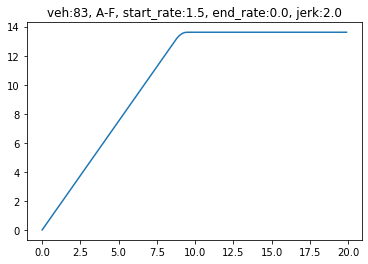

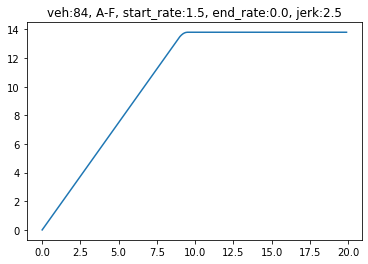

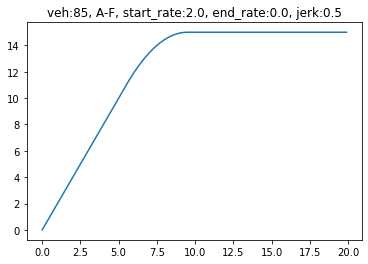

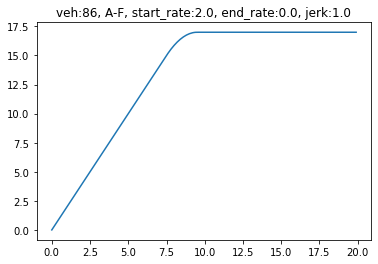

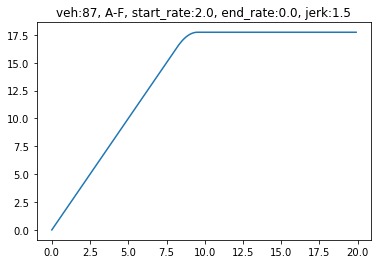

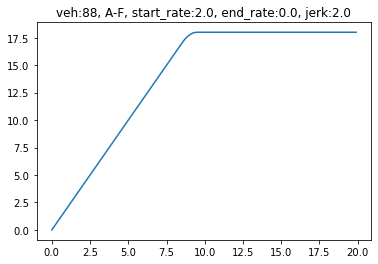

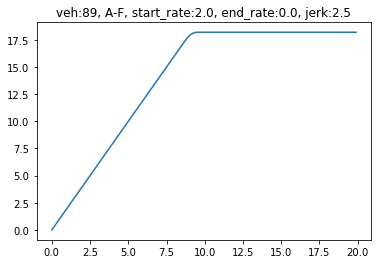

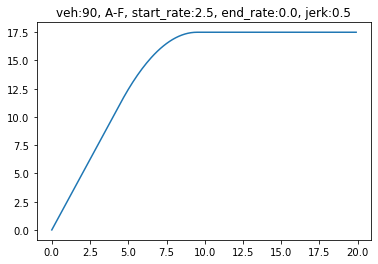

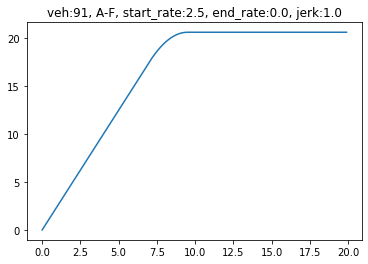

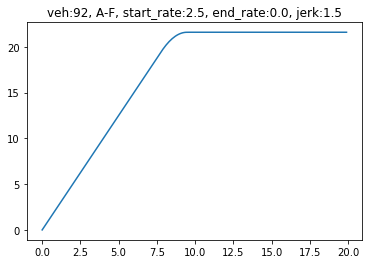

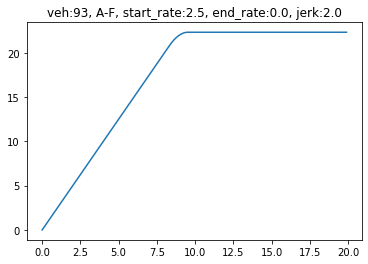

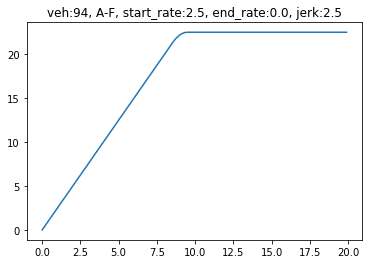

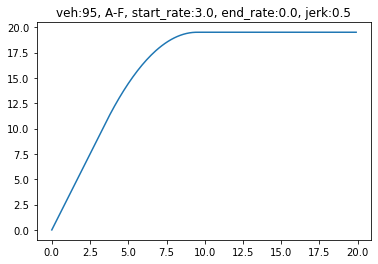

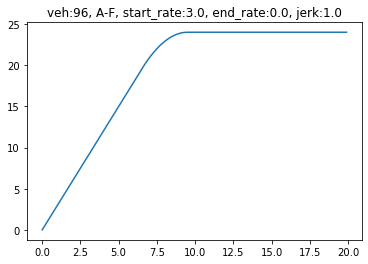

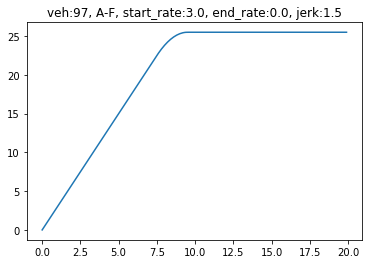

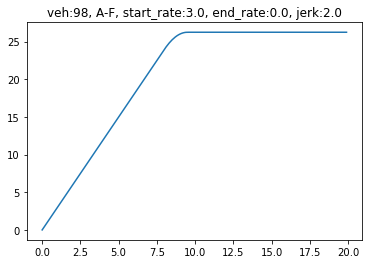

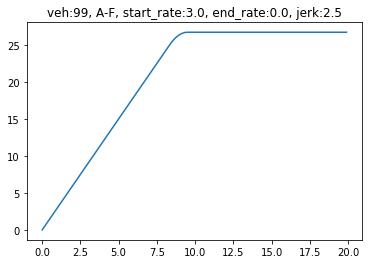

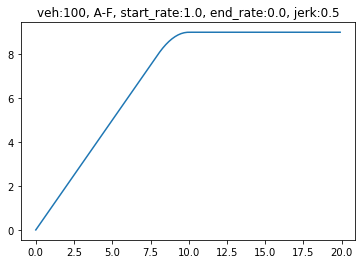

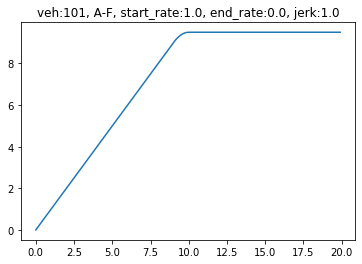

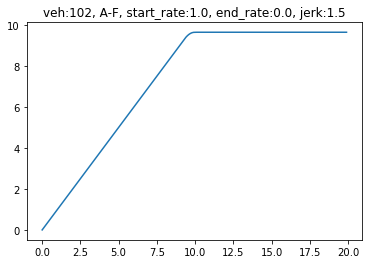

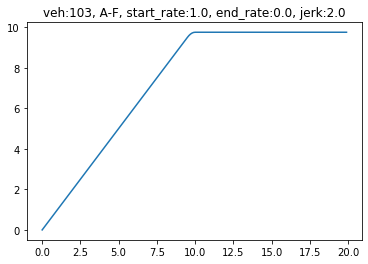

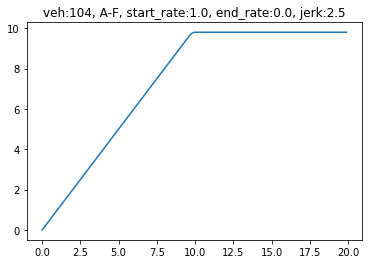

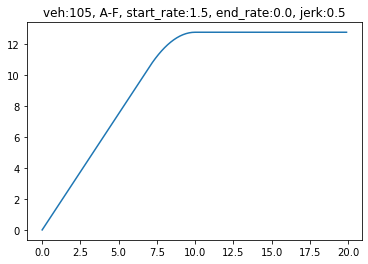

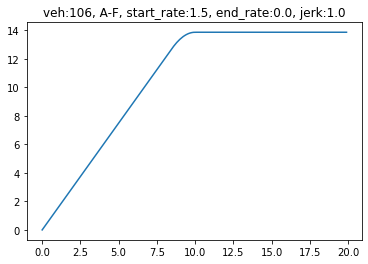

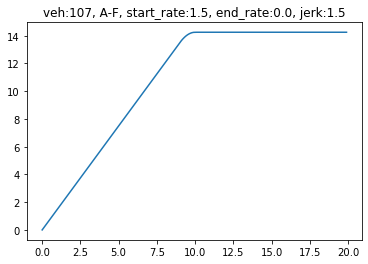

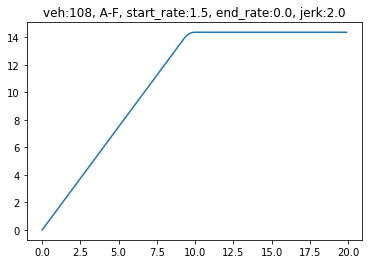

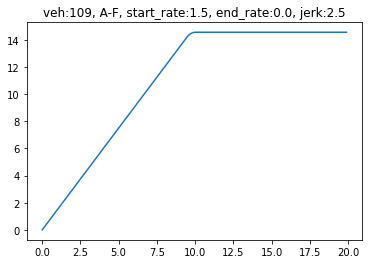

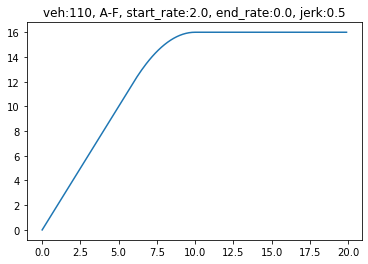

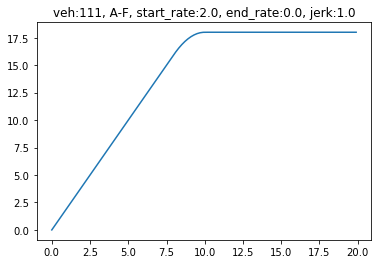

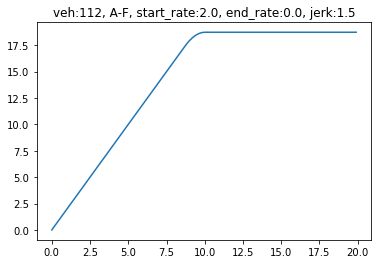

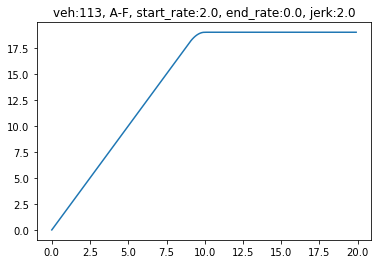

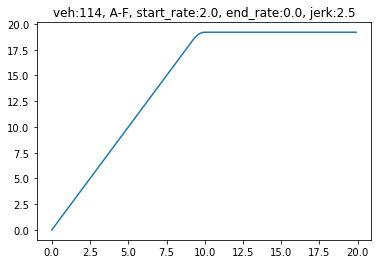

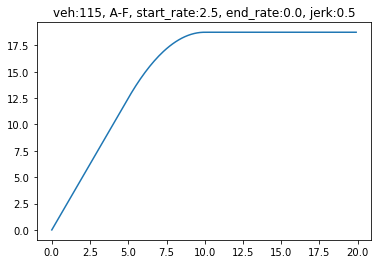

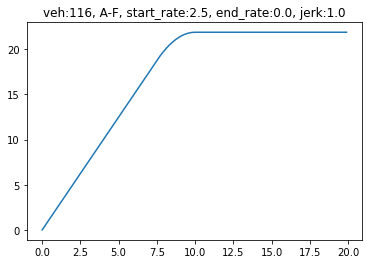

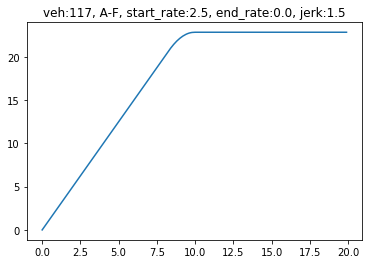

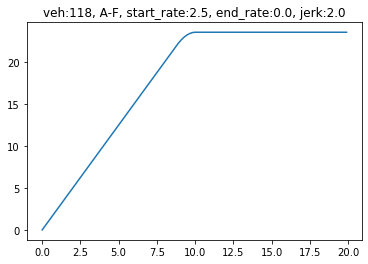

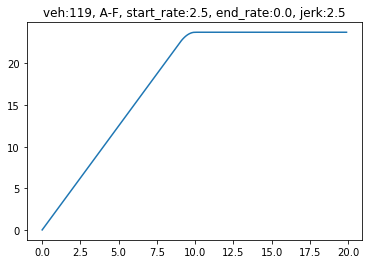

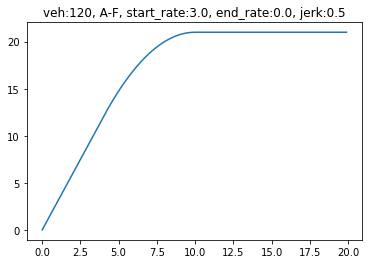

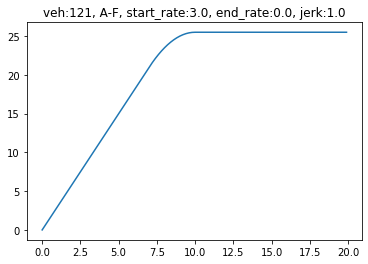

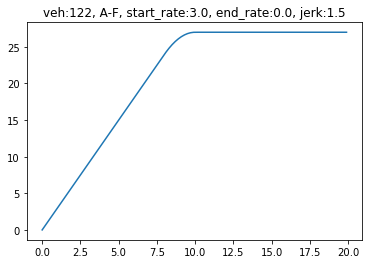

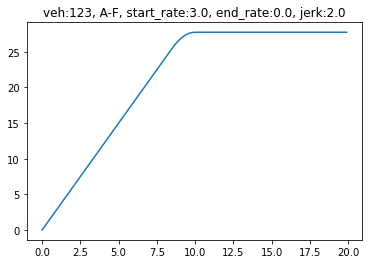

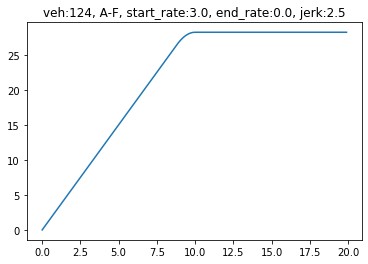

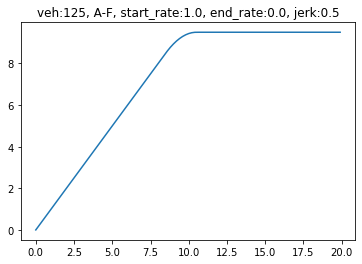

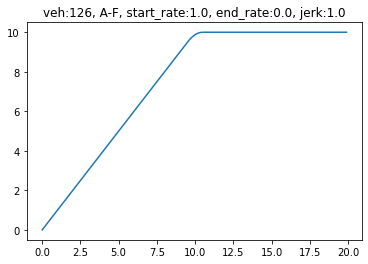

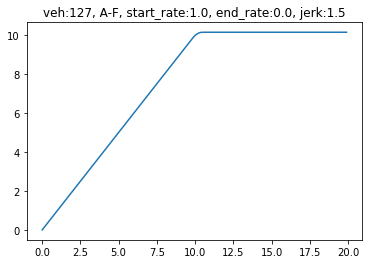

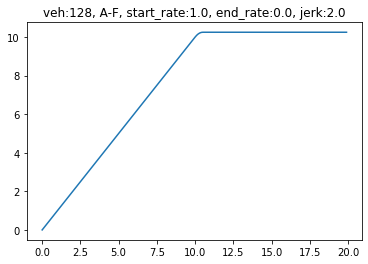

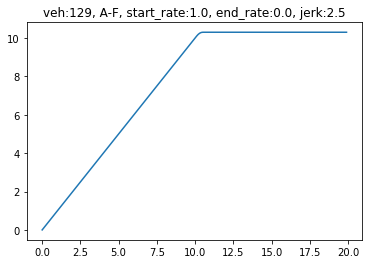

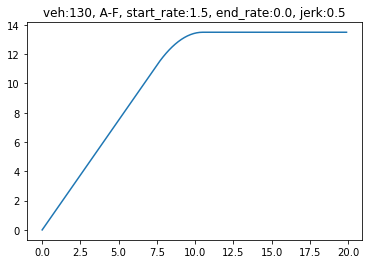

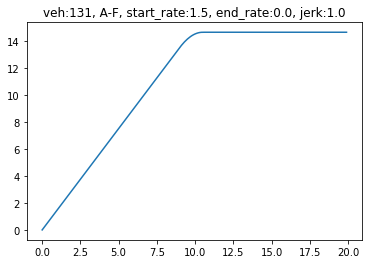

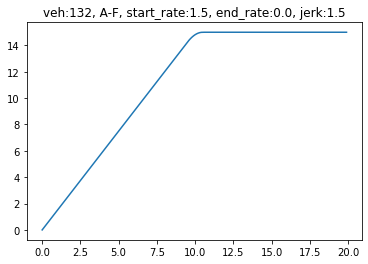

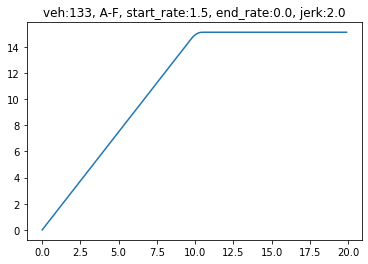

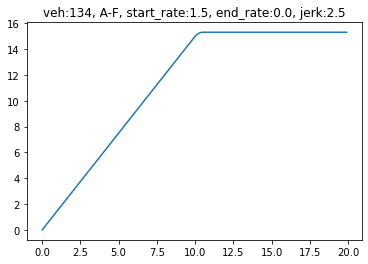

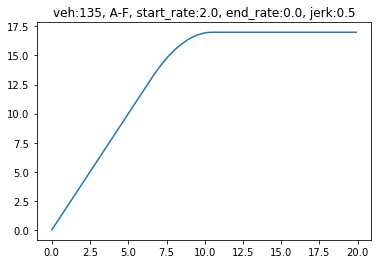

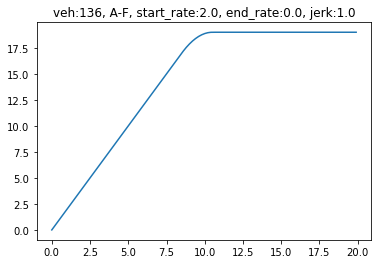

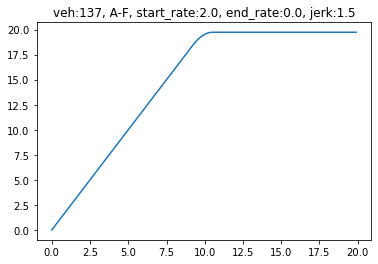

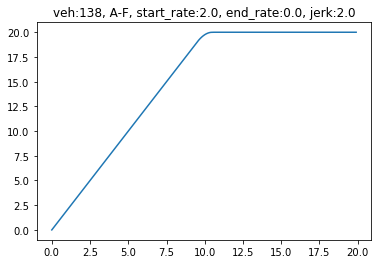

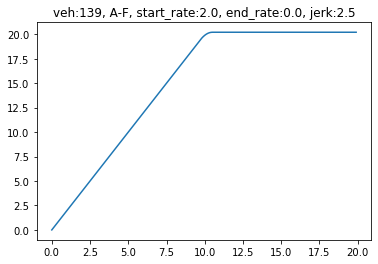

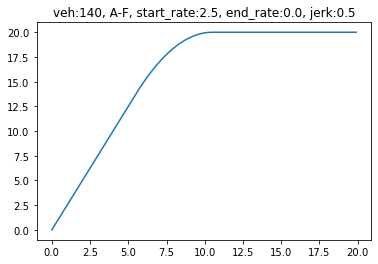

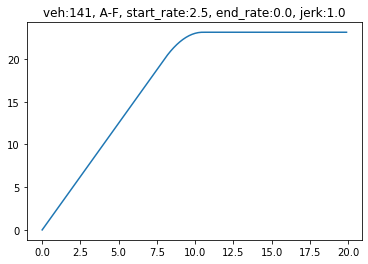

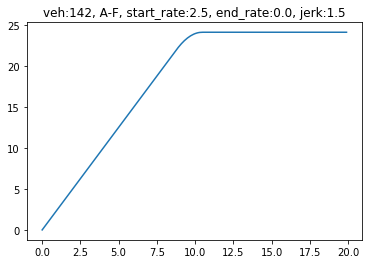

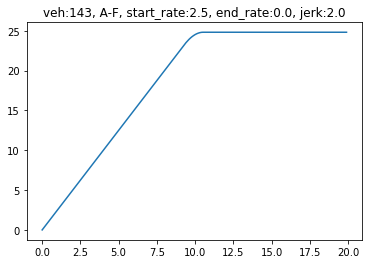

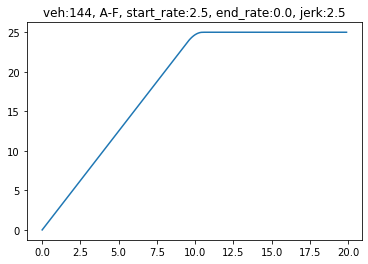

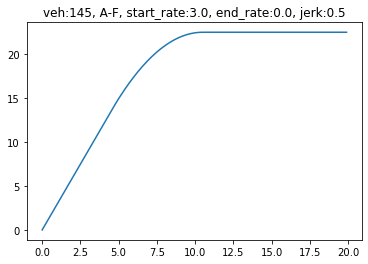

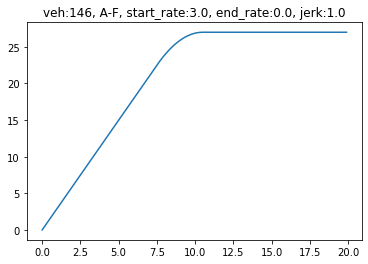

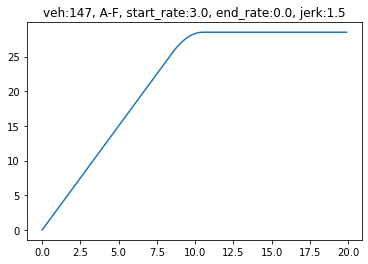

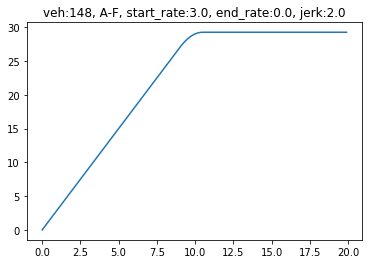

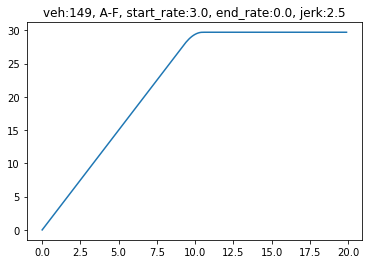

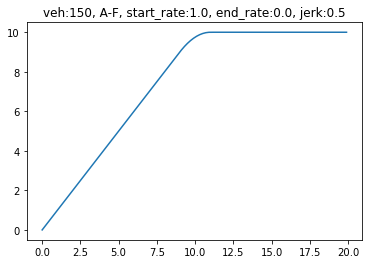

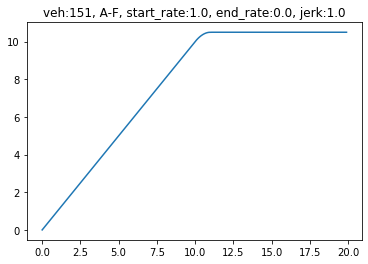

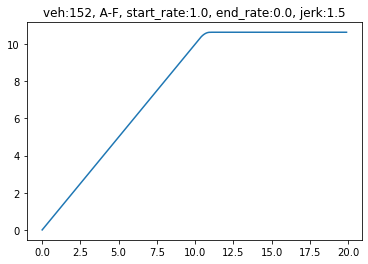

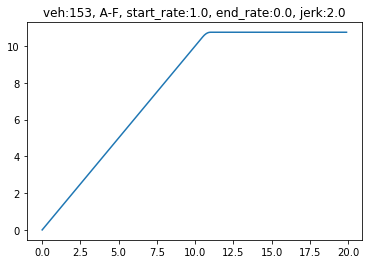

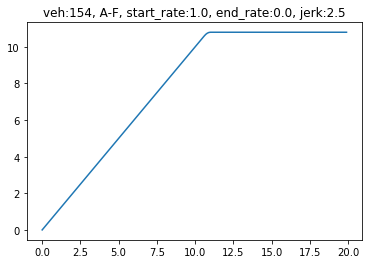

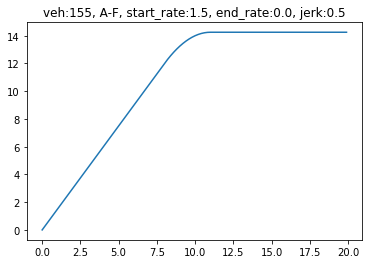

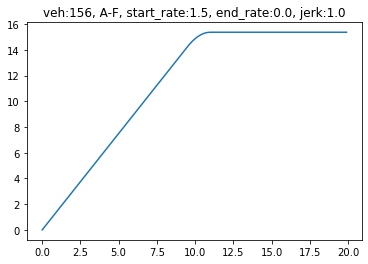

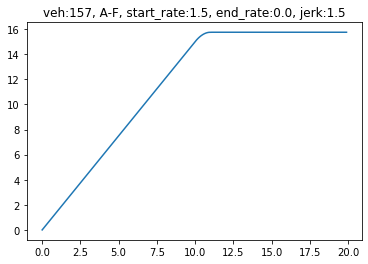

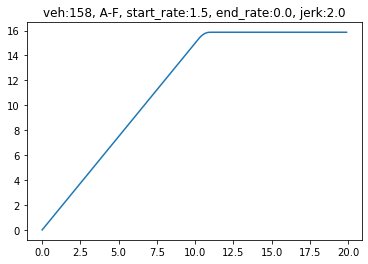

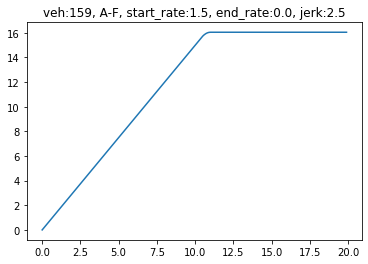

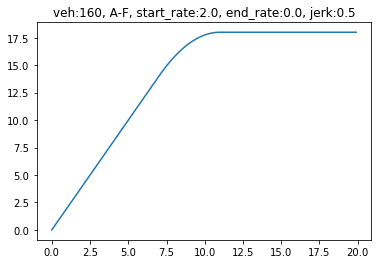

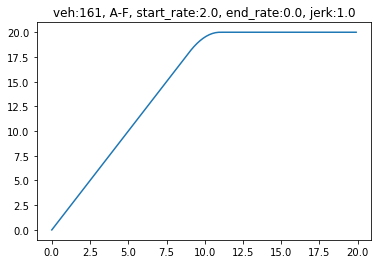

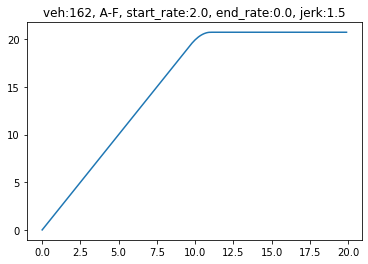

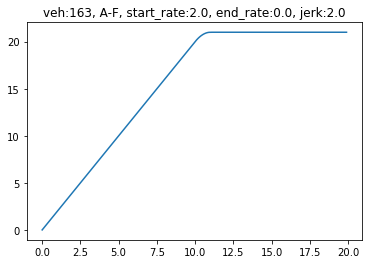

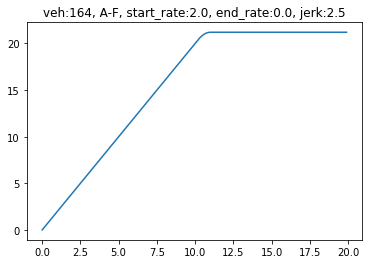

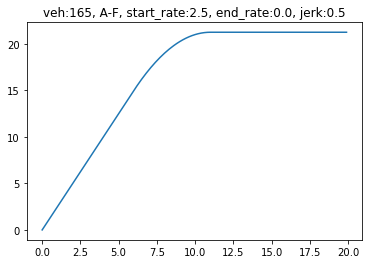

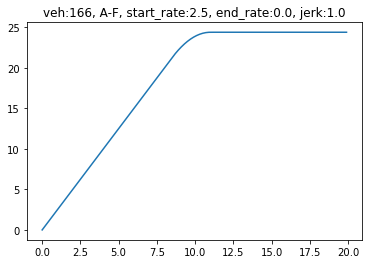

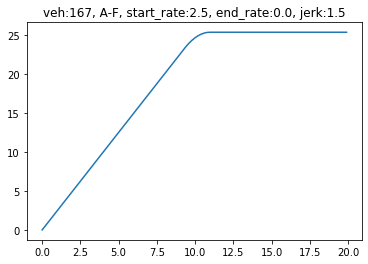

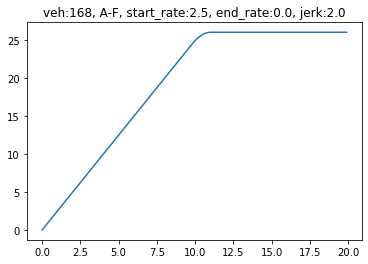

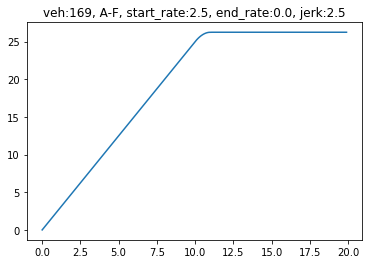

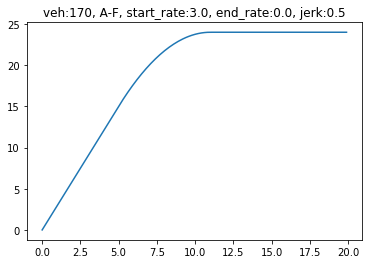

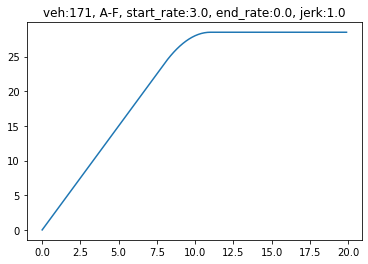

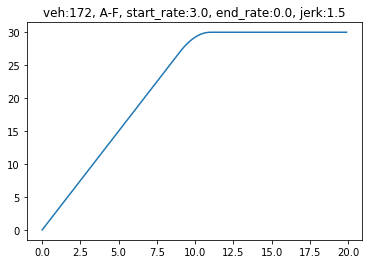

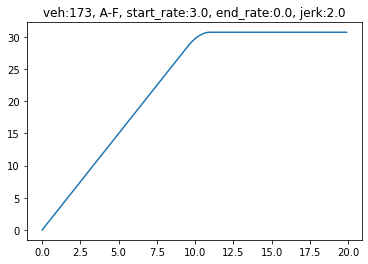

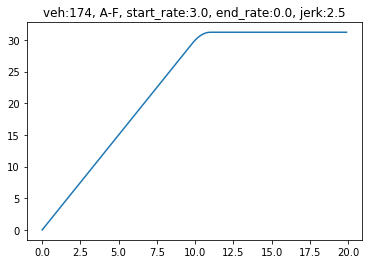

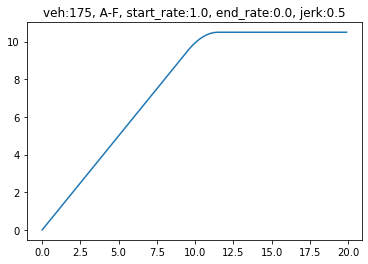

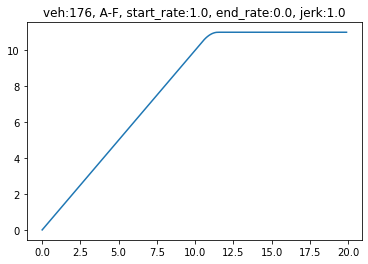

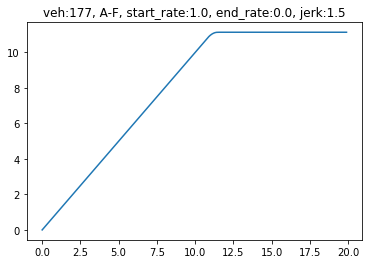

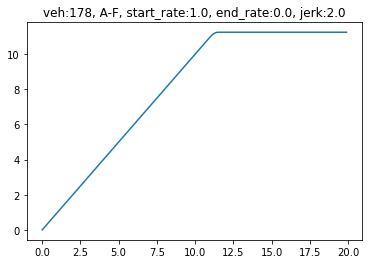

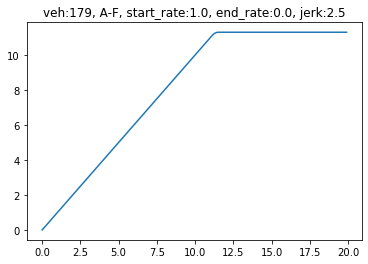

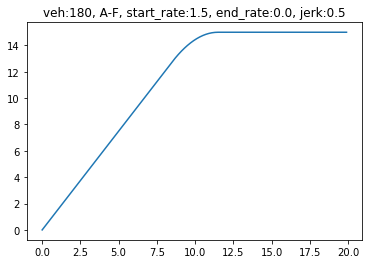

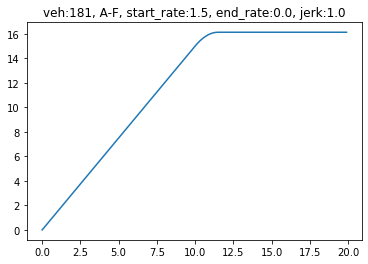

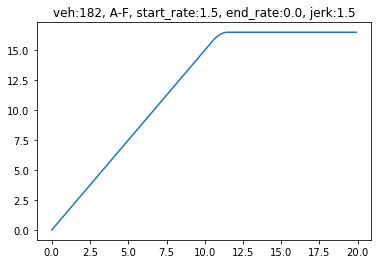

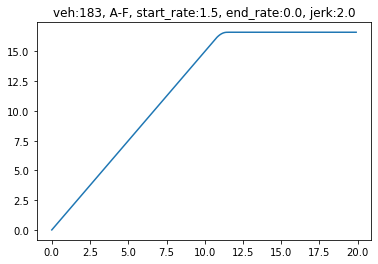

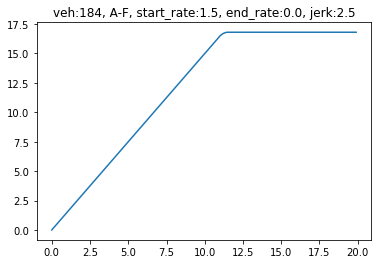

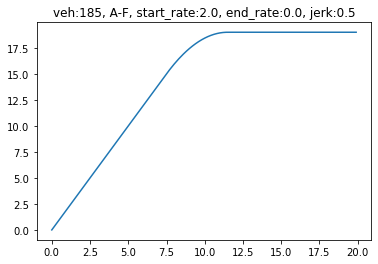

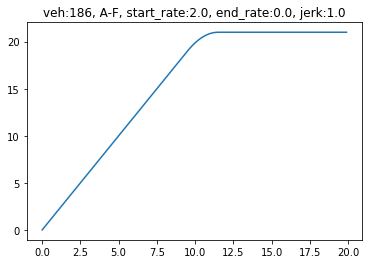

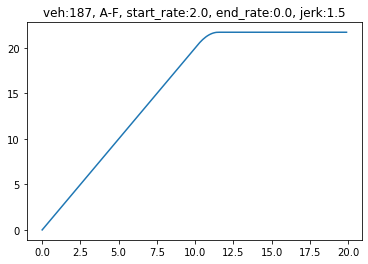

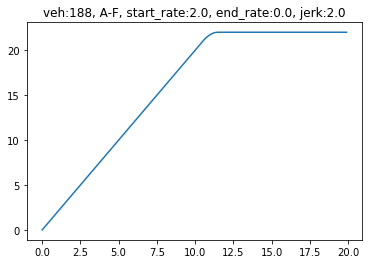

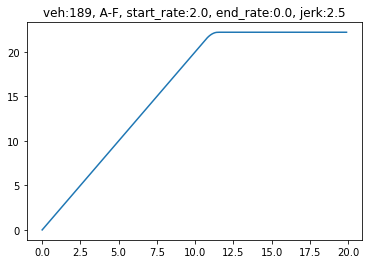

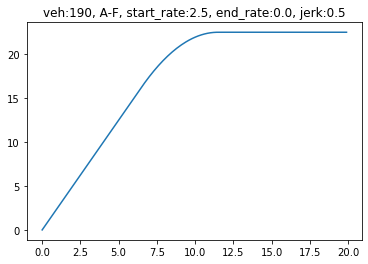

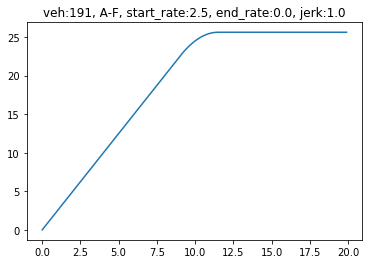

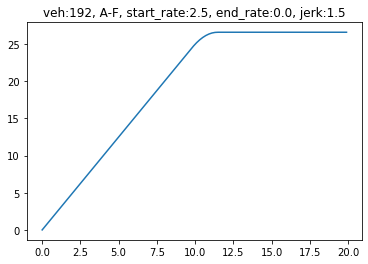

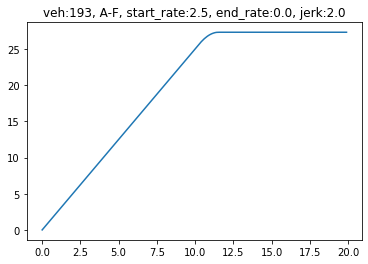

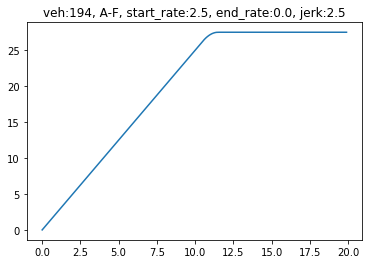

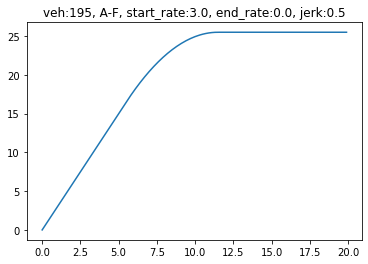

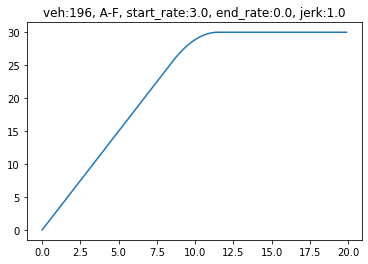

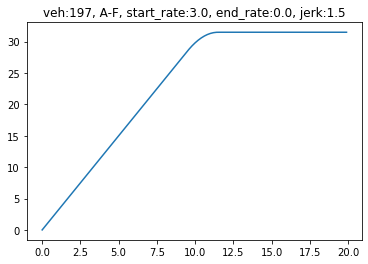

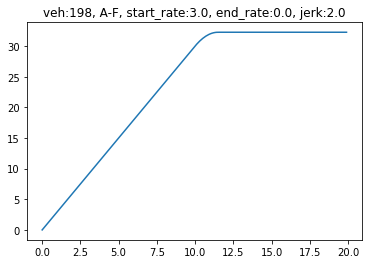

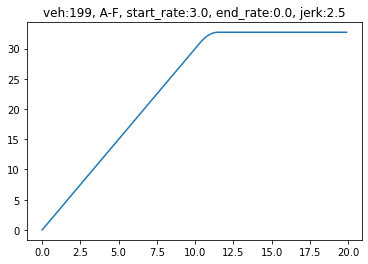

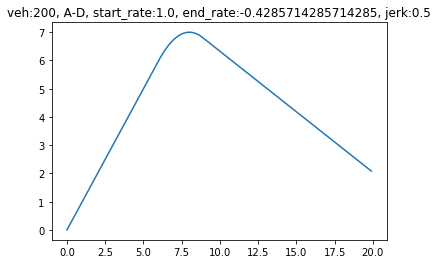

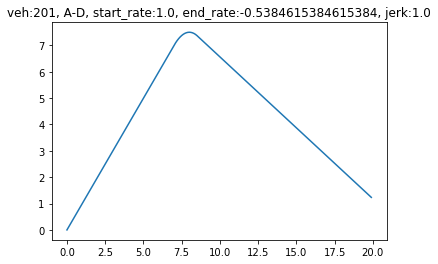

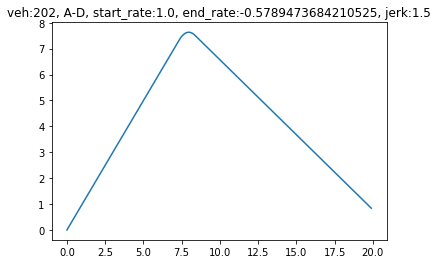

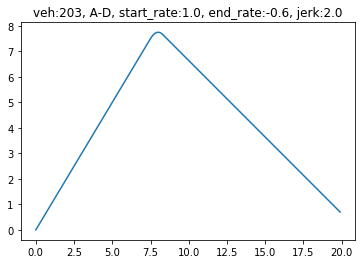

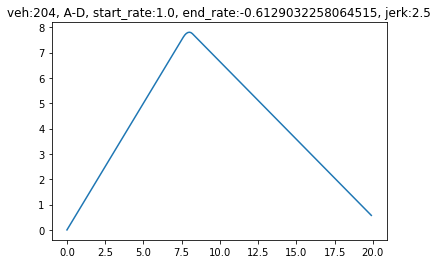

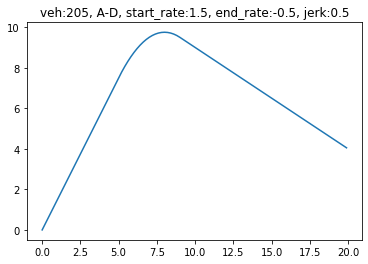

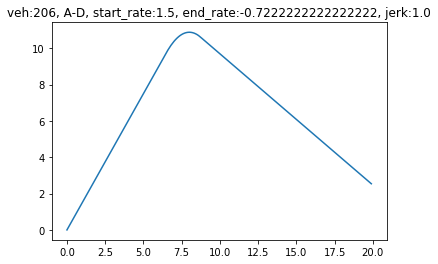

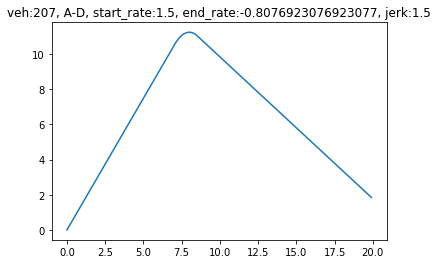

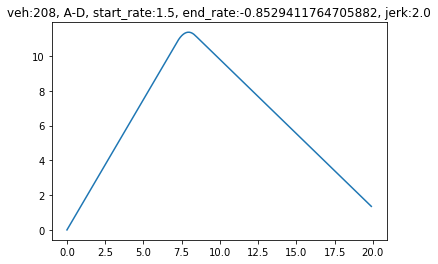

KeyboardInterrupt: 

In [6]:
#########################produce the individual speed profile and WT results plots for each trajectory#####
###(TODO: Jieming) Add subplot for WT peak point, save the figs to a folder 
for i in range(1000):
    this_traj = all_synthetic_trj[all_synthetic_trj['veh_id'] == i]
    this_traj_info = traj_info[traj_info['veh_id'] == i]
    start_rate = this_traj['acceleration'].iloc[0]
    end_rate = this_traj['acceleration'].iloc[-1]
    jerk = this_traj_info['test_jerk'].iloc[0]
    state_change = state_change_label[this_traj_info['state_change_label'].iloc[0]]
    plt.plot(this_traj['local_time'], this_traj['speed'])
    plt.title(f'veh:{i}, {state_change}, start_rate:{start_rate}, end_rate:{end_rate}, jerk:{jerk}')
    plt.show()
